# New Restaurants Franchise

Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet.
<br>
The chain already has trucks in various cities and you have data for
profits and populations from the cities.
<br>
<br>
You would like to use this data to help you select which city to expand
to next.
<br>
The file ex1data1.txt contains the dataset for our linear regression problem.
<br>
The first column is the population of a city and the second column is
the profit of a food truck in that city. 
<br>
A negative value for profit indicates a
loss.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

In [2]:
df = pd.read_csv('ex1data1.txt', sep=",", header=None)
df.rename(columns={0: 'city_pop', 1:'profit'}, inplace=True)
df.head()

,city_pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


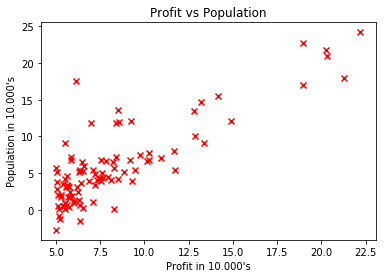

In [3]:
plt.scatter(df['city_pop'], df['profit'], marker='x', color='r')
plt.title('Profit vs Population')
plt.xlabel("Profit in 10.000's")
plt.ylabel("Population in 10.000's")
plt.show()

In [4]:
# Gradient descent settings
iterations = 1500
alpha = 0.01
theta = np.zeros(2)
y = np.array(df['profit'])
X = np.array(df['city_pop'])
X = X.reshape(len(X), 1)
ones = np.ones(len(X)).reshape(len(X), 1)
X = np.hstack((ones, X))

In [5]:
# Compute the square error
def compute_square_error(X, y, theta):
    J = (1/(2*len(X))) * (sum((X.dot(theta) - y)**2)) #Vectorized form of the square error formula
    return J

In [6]:
compute_square_error(X,y,theta)

32.072733877455654

In [7]:
 # Gradient Descent Implementation
def gradient_descent(theta, alpha, X, y, iterations):
    m = len(X)
    for i in range(iterations):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X)) # Vectorized form of the gradient descent formula
    return theta

In [8]:
theta = gradient_descent(theta, alpha, X, y, iterations)
df['profit_prediction'] = X.dot(theta)
df.head()

,city_pop,profit,profit_prediction
0,6.1101,17.5920,3.496299
1,5.5277,9.1302,2.817010
2,8.5186,13.6620,6.305483
3,7.0032,11.8540,4.537977
4,5.8598,6.8233,3.204359


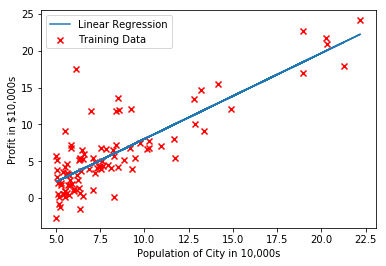

In [9]:
plt.figure()
plt.scatter(df['city_pop'], df['profit'], marker='x', color='r', label='Training Data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(df['city_pop'], df['profit_prediction'], label='Linear Regression')
plt.legend(loc='upper left', numpoints=1)
plt.show()

make predictions on profits in
areas of 35,000 and 70,000 people.

In [10]:
predict1 = np.array([1, 3.5]).dot(theta)
print ("For a population of 35,000, profit prediction = ", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print ("For a population of 70,000, profit prediction = ", predict2 * 10000)

For a population of 35,000, profit prediction =  4519.7678677017675
For a population of 70,000, profit prediction =  45342.45012944714


### Scikit Learn Lineal Regression Implementation

In [11]:
linearRegressor = LinearRegression()
lx = np.array(df['city_pop']).reshape(len(df['city_pop']), 1)
ly = np.array(df['profit']).reshape(len(df['profit']), 1)
linearRegressor.fit(lx, ly)
prediction = linearRegressor.predict(lx)

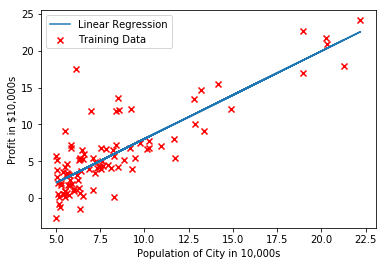

In [12]:
plt.figure()
plt.scatter(lx, ly, marker='x', color='r', label='Training Data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(lx, prediction, label='Linear Regression')
plt.legend(loc='upper left', numpoints=1)
plt.show()


make predictions on profits in
areas of 35,000 and 70,000 people.

In [13]:
predict1 = linearRegressor.predict(np.array([[3.5]])) 
print ("For a population of 35,000, profit prediction = ", predict1 * 10000)

predict2 = linearRegressor.predict(np.array([[7]])) 
print ("For a population of 70,000, profit prediction = ", predict2 * 10000)

For a population of 35,000, profit prediction =  [[2798.36876352]]
For a population of 70,000, profit prediction =  [[44554.54631015]]
